In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

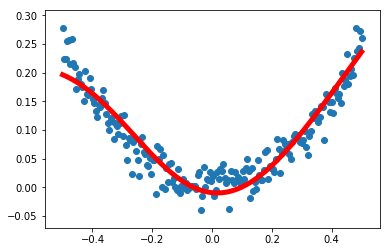

[array([[ 0.57584494,  0.0337349 , -0.04043674, -2.4532259 , -1.4586475 ,
        -0.23698248,  0.19501755,  0.25988042, -1.6121768 , -0.7909769 ]],
      dtype=float32), array([[-0.03133085,  0.0446549 , -0.04648726, -0.572062  ,  0.00726772,
        -0.06349266,  0.0892351 , -0.01911712, -0.10519117, -0.00454496]],
      dtype=float32)]


In [5]:
# 使用numpy生成200个随机数
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]
noises = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noises

# 定义两个 placeholder
x = tf.placeholder(tf.float32, [None,1])
y = tf.placeholder(tf.float32, [None,1])

# 定义nn中间层
weights_l1 = tf.Variable(tf.random_normal([1, 10]))
baises_l1 = tf.Variable(tf.zeros([1, 10]))
wx_baises_l1 = tf.matmul(x, weights_l1) + baises_l1
# 激活函数
output_l1 = tf.nn.tanh(wx_baises_l1)


# 定义神经网络的输出层
weights_l2 = tf.Variable(tf.random_normal([10, 1]))
baises_l2 = tf.Variable(tf.zeros([1, 1]))
wx_baises_l2 = tf.matmul(output_l1, weights_l2) + baises_l2
# 最终输出层
prediction = tf.nn.tanh(wx_baises_l2)

# 损失函数
loss = tf.reduce_mean(tf.square(y-prediction))

# 梯度下降法
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# 变量
init_op = tf.global_variables_initializer()

# session
with tf.Session() as sess:
    # 初始化变量
    sess.run(init_op)
    # 开始训练
    for _ in range(2000):
        sess.run(train_step, feed_dict={x: x_data, y: y_data})
#         if _%1000 == 0:
#             print(_, sess.run([weights_l1, baises_l1]))
            
    # 最终预测值
    prediction_values = sess.run(prediction, feed_dict={x: x_data})
    
    # 画图
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, prediction_values, 'r-', lw=5)
    plt.show()
    
    print(sess.run([weights_l1, baises_l1]))